## Mi primer pandas y regresión lineal


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### Cargando los datos de real estate

In [3]:
data = pd.read_csv('/Users/sebastianschmidtpuga/Desktop/MachineLearnig-Alexis/Bases de datos/propiedades_Chile_venta (3).csv')

In [4]:
data

,precio,superficie_total,superficie_util,dormitorios,banos,estacionamientos,tipo
0,4871.0,126.0,115.0,4,1,1,Casa
1,16000.0,440.0,410.0,8,6,0,Casa
2,3200.0,95.0,186.0,5,3,0,Casa
3,6000.0,100.0,220.0,3,2,2,Casa
4,9897.0,394.0,140.0,3,2,2,Casa
...,...,...,...,...,...,...,...
19995,1806.0,29.0,29.0,1,1,0,Departamento
19996,2048.0,31.4,31.4,1,1,0,Departamento
19997,1423.0,22.0,22.0,1,1,0,Departamento
19998,2048.0,31.4,31.4,1,1,0,Departamento


### Estadistica descriptiva basica

In [5]:
data.describe()

,precio,superficie_total,superficie_util,dormitorios,banos,estacionamientos
count,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000
mean,8856.250065,9.422168e+03,7.858487e+02,3.643000,2.677550,1.724150
std,8976.577001,5.662226e+05,7.114132e+04,2.233652,1.639302,3.355715
min,0.104279,5.000000e-01,1.000000e+00,1.000000,1.000000,-6.000000
25%,3759.263315,8.000000e+01,7.000000e+01,3.000000,2.000000,0.000000
50%,6350.000000,1.580000e+02,1.170000e+02,3.000000,2.000000,1.000000
75%,11000.000000,4.871250e+02,2.000000e+02,4.000000,3.000000,2.000000
max,320000.000000,5.000000e+07,1.000000e+07,91.000000,57.000000,167.000000


### Vemos que la base original del web scrapping posee muchos problemas. Esto lo podemos ver sobre todo en los maximos y minimos.

### Computamos los histogramas

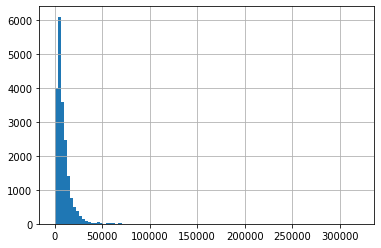

In [6]:
data.precio.hist(bins=100)
plt.show()

### Al ver el histograma me doy cuenta que la variable precio posee una distribución muy sesgada en las colas. esto se puede debere a datos mal computados o extremos, que no sirven para el reconocimiento de patrones

### Dado lo anterior vamos a utilizar un data drop para sacar los datos extremos

In [7]:
data.drop(data[data.precio>30000].index, inplace=True)

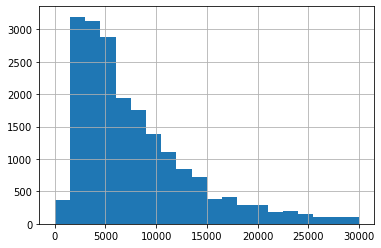

In [8]:
data.precio.hist(bins=20)
plt.show()

In [9]:
data.drop(data[data.precio<1000].index, inplace=True)

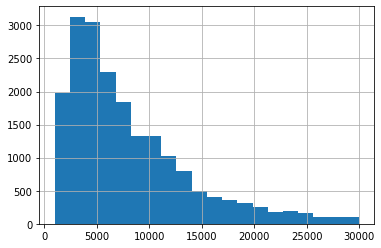

In [10]:
data.precio.hist(bins=20)
plt.show()

In [11]:
data.describe()

,precio,superficie_total,superficie_util,dormitorios,banos,estacionamientos
count,19460.000000,1.946000e+04,1.946000e+04,19460.000000,19460.000000,19460.000000
mean,8018.893463,5.485656e+03,7.771754e+02,3.581244,2.616290,1.682374
std,5805.958074,4.265270e+05,7.207912e+04,2.107528,1.551219,3.333539
min,1000.000000,5.000000e-01,1.000000e+00,1.000000,1.000000,-6.000000
25%,3750.000000,7.900000e+01,7.000000e+01,3.000000,2.000000,0.000000
50%,6210.956782,1.510000e+02,1.130000e+02,3.000000,2.000000,1.000000
75%,10700.000000,4.432500e+02,1.900000e+02,4.000000,3.000000,2.000000
max,30000.000000,5.000000e+07,1.000000e+07,91.000000,57.000000,167.000000


### Vemos que al quitar los outliers de precio de las colas derecha e izquierda mejoro la distribución de mis datos

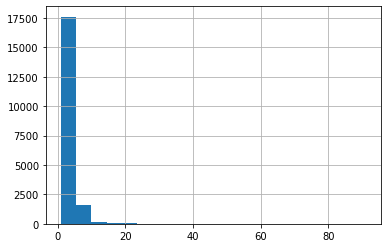

In [12]:
data.dormitorios.hist(bins=20)
plt.show()

In [13]:
data.drop(data[data.dormitorios>10].index, inplace=True)

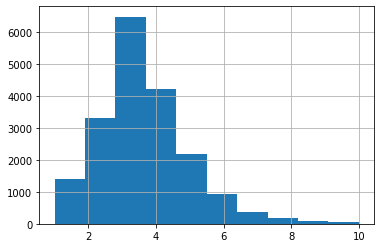

In [14]:
data.dormitorios.hist(bins=10)
plt.show()

In [15]:
data.describe()

,precio,superficie_total,superficie_util,dormitorios,banos,estacionamientos
count,19265.000000,1.926500e+04,1.926500e+04,19265.000000,19265.000000,19265.000000
mean,7959.948815,5.525336e+03,7.787559e+02,3.455645,2.554062,1.671165
std,5759.840262,4.286800e+05,7.244286e+04,1.507600,1.294754,3.320018
min,1000.000000,5.000000e-01,1.000000e+00,1.000000,1.000000,-6.000000
25%,3700.000000,7.800000e+01,7.000000e+01,3.000000,2.000000,0.000000
50%,6200.000000,1.500000e+02,1.120000e+02,3.000000,2.000000,1.000000
75%,10500.000000,4.250000e+02,1.870000e+02,4.000000,3.000000,2.000000
max,30000.000000,5.000000e+07,1.000000e+07,10.000000,13.000000,167.000000


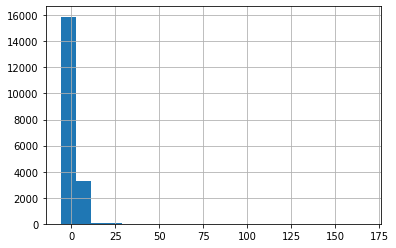

In [16]:
data.estacionamientos.hist(bins=20)
plt.show()

In [17]:
data.drop(data[data.estacionamientos>10].index, inplace=True)

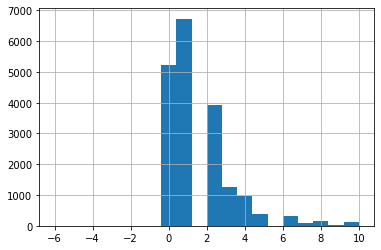

In [18]:
data.estacionamientos.hist(bins=20)
plt.show()

In [19]:
data.drop(data[data.estacionamientos<0].index, inplace=True)

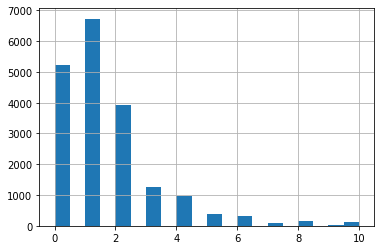

In [20]:
data.estacionamientos.hist(bins=20)
plt.show()

In [25]:
data.describe()

,precio,superficie_total,superficie_util,dormitorios,banos,estacionamientos
count,19155.000000,1.915500e+04,1.915500e+04,19155.000000,19155.000000,19155.000000
mean,7941.025677,5.533824e+03,7.813910e+02,3.449491,2.550091,1.518925
std,5746.526731,4.299090e+05,7.265056e+04,1.501972,1.290739,1.658696
min,1000.000000,5.000000e-01,1.000000e+00,1.000000,1.000000,0.000000
25%,3700.000000,7.800000e+01,7.000000e+01,3.000000,2.000000,0.000000
50%,6200.000000,1.500000e+02,1.110000e+02,3.000000,2.000000,1.000000
75%,10500.000000,4.160000e+02,1.850000e+02,4.000000,3.000000,2.000000
max,30000.000000,5.000000e+07,1.000000e+07,10.000000,13.000000,10.000000


In [26]:
data.drop(data[data.superficie_total>2000].index, inplace=True)

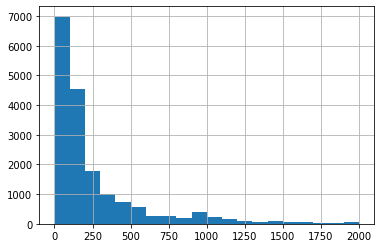

In [27]:
data.superficie_total.hist(bins=20)
plt.show()

In [28]:
data.drop(data[data.superficie_total<30].index, inplace=True)

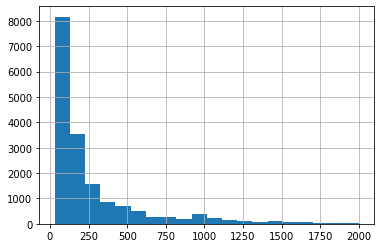

In [29]:
data.superficie_total.hist(bins=20)
plt.show()

In [30]:
data.drop(data[data.superficie_util>700].index, inplace=True)

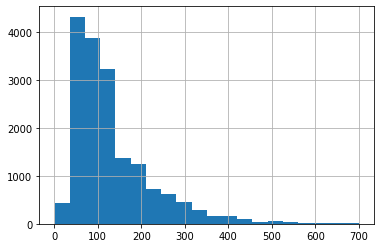

In [31]:
data.superficie_util.hist(bins=20)
plt.show()

In [36]:
data.drop(data[data.superficie_util<30].index, inplace=True)
data.to_csv("Propiedades_chile.csv", index=False)

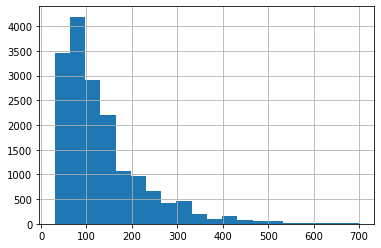

In [33]:
data.superficie_util.hist(bins=20)
plt.show()

In [34]:
data.describe()

,precio,superficie_total,superficie_util,dormitorios,banos,estacionamientos
count,17099.000000,17099.000000,17099.000000,17099.000000,17099.000000,17099.000000
mean,7569.983082,268.174850,133.778665,3.382186,2.476636,1.401953
std,5462.509587,327.248395,93.562088,1.440589,1.227569,1.411282
min,1000.000000,30.000000,30.000000,1.000000,1.000000,0.000000
25%,3600.000000,76.000000,70.000000,2.000000,2.000000,0.000000
50%,5884.064319,139.000000,105.000000,3.000000,2.000000,1.000000
75%,9990.000000,300.000000,165.000000,4.000000,3.000000,2.000000
max,30000.000000,2000.000000,700.000000,10.000000,13.000000,10.000000


### Graficamos nuestro primer scatter entre superficie util y precio

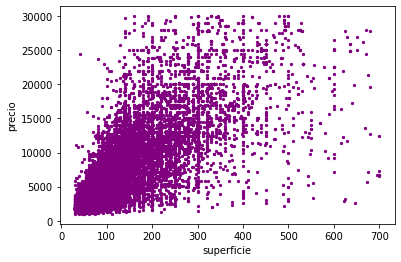

In [30]:
plt.scatter(data.superficie_util,data.precio,color= 'purple',s=5)
plt.xlabel('superficie')
plt.ylabel('precio')
plt.show()

### Estimamos los kerneld de la data para ver las distribuciones empíricas estimadas de los datos

### El kernel nos muestra cómo distribuyen los datos

### como ver problemas en los kernels: 1) Probelmas en las colas, 2) Es multimodal?, 3) Problema de convergencia (pre procesar)


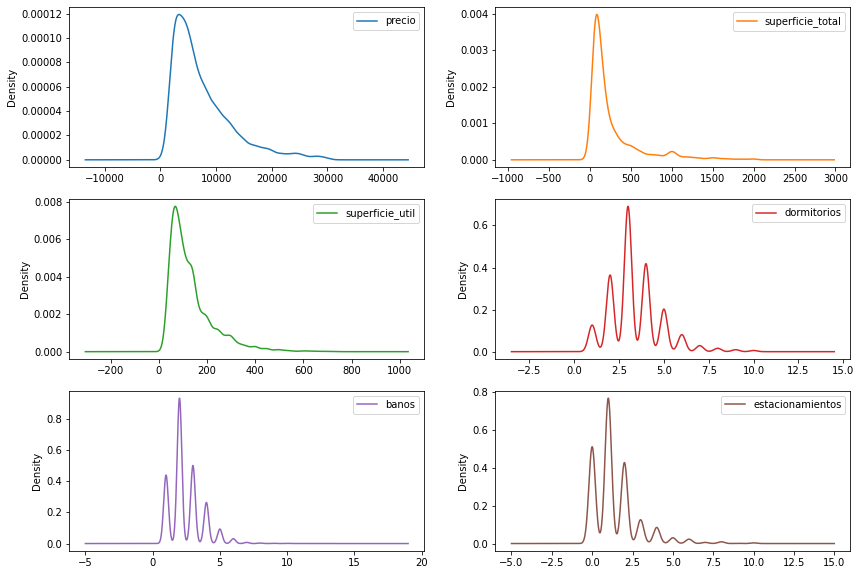

In [31]:
data.plot(kind ='kde',subplots= True, layout = (3,2),sharex = False,sharey=False,figsize = (14,10))
plt.show()

### Matriz de scatter plots

In [32]:
from pandas.plotting import scatter_matrix

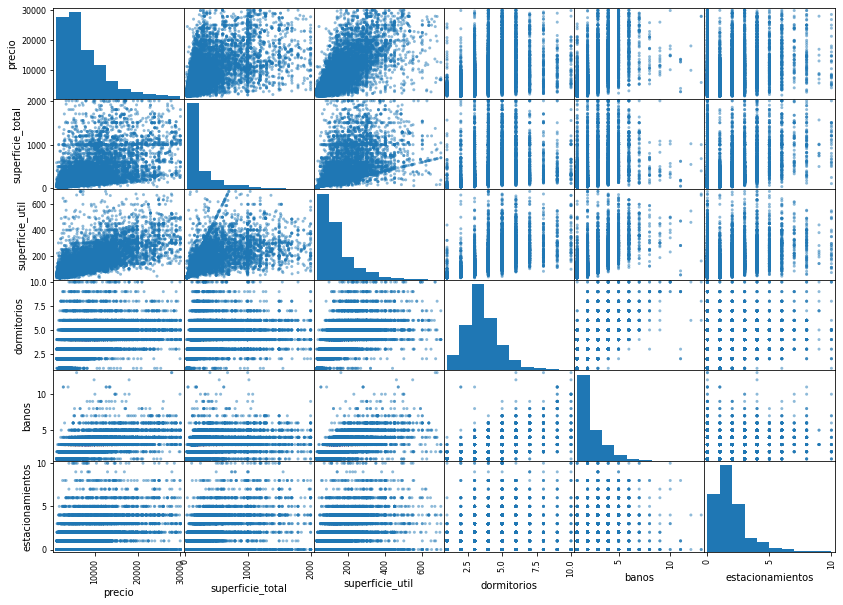

In [33]:
scatter_matrix(data,figsize=(14,10))
plt.show()

### Agrupaciones por categorizaciones

In [34]:
groups = data.groupby('tipo')

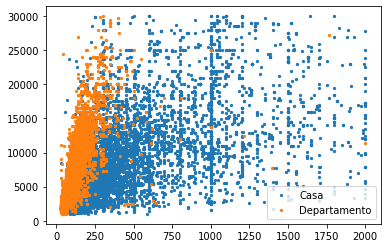

In [35]:
for name, group in groups:
    plt.scatter(group['superficie_total'],group['precio'],s=5,label=name)
    plt.legend()

In [36]:
data.groupby(['tipo']).mean()

,precio,superficie_total,superficie_util,dormitorios,banos,estacionamientos
tipo,,,,,,
Casa,9382.056996,478.419171,187.119430,4.257592,2.967256,1.953393
Departamento,6129.075174,100.994746,91.363658,2.686089,2.086509,0.963465


### Nuestros primeros modelos

### Nuestro primer modelo será un modelo de precio vs superficie util

$ pi = b0 + b1SUi + ei

In [52]:
X = np.column_stack([np.ones_like(data.superficie_util), data.superficie_util])

In [53]:
X[0:4,:]

array([[  1., 115.],
       [  1., 410.],
       [  1., 186.],
       [  1., 220.]])

### La primera versión del modelo la estimaremos a traves de mis ecuaciones normales
$\hat{\beta} = (X'X)^{-1}X'y$

In [54]:
ß = np.linalg.inv(X.T@X)@(X.T@data.precio)
print(ß)

[1804.5008543    43.09717256]


### Veamos el modelo en un scatter plot

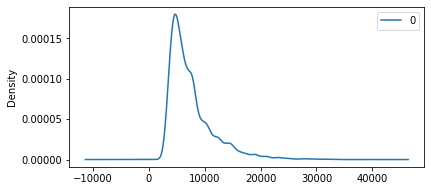

In [50]:
y_pred = X@ß ### Estoy creando el vector de la prediccion para cada observacion

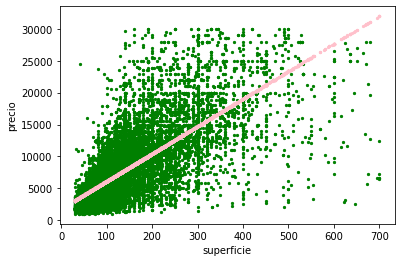

In [44]:
plt.scatter(data.superficie_util,data.precio,s=5,color='green')
plt.scatter(data.superficie_util,y_pred,s=5,color='pink')
plt.xlabel('superficie')
plt.ylabel('precio')
plt.show()

### Estimaremos el mismo modelo pero utilizando stats models

In [45]:
import statsmodels.api as sm

In [46]:
model = sm.OLS(data.precio,X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 precio   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                 2.047e+04
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        09:22:39   Log-Likelihood:            -1.6468e+05
No. Observations:               17099   AIC:                         3.294e+05
Df Residuals:                   17097   BIC:                         3.294e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1804.5009     49.174     36.696      0.000    1708.114    1900.887
x1            43.0972      0.301    143.074      0.000      42.507      43.688
==============================================================================
Omnibus:                     2956.975   Durbin-Watson:                   1.206
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24366.045
Skew:                           0.598   Prob(JB):                         0.00
Kurtosis:                       8.724   Cond. No.                         285.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Estimemos el siguiente modelo
 $p_i = \alpha_0 + \alpha_1 SU_i + \alpha_2 NB_i + \epsilon$

In [68]:
X_2 = np.column_stack([np.ones_like(data.superficie_util),data.superficie_util,data.banos])
ß_2 = np.linalg.inv(X_2.T@X_2)@(X_2.T@data.precio)
print(ß_2)

data1 = pd.merge(data["superficie_util"], data["banos"], left_index=True, right_index=True, )
data1

[ -87.13609423   28.65198778 1544.06800039]


,superficie_util,banos
0,115.0,1
1,410.0,6
2,186.0,3
3,220.0,2
4,140.0,2
...,...,...
19992,31.0,1
19994,30.0,1
19996,31.4,1
19998,31.4,1


In [71]:

y_pred2 = X_2*ß_2
y_pred2
pd.DataFrame(data1,y_pred2)

array([[  -87.13609423,  3294.97859445,  1544.06800039],
       [  -87.13609423, 11747.31498889,  9264.40800237],
       [  -87.13609423,  5329.26972667,  4632.20400118],
       ...,
       [  -87.13609423,   899.67241622,  1544.06800039],
       [  -87.13609423,   899.67241622,  1544.06800039],
       [  -87.13609423,   899.67241622,  1544.06800039]])

In [51]:
model_b = sm.OLS(data.precio,X_2)
model_b = model_b.fit()
model_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 precio   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                 1.304e+04
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        09:34:42   Log-Likelihood:            -1.6349e+05
No. Observations:               17099   AIC:                         3.270e+05
Df Residuals:                   17096   BIC:                         3.270e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -87.1361     59.193     -1.472      0.141    -203.160      28.888
x1            28.6520      0.401     71.500      0.000      27.867      29.437
x2          1544.0680     30.542     50.555      0.000    1484.202    1603.934
==============================================================================
Omnibus:                     3461.336   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21793.758
Skew:                           0.825   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                         390.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""